In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from music import *
from matched_beamforming import *
from analysis import *

## Loading data

In [2]:
real_data_folder = "../data/"
real_data_1 = real_data_folder + "data_1.npz"
real_data_2 = real_data_folder + "data_2.npz"

In [3]:
def load_data(data_str):
    npz_data = np.load(data_str)
    return npz_data["XYZ"], npz_data["S"], float(npz_data["T_slot"]), float(npz_data["lambda_"]), npz_data["src_model"]

In [4]:
antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_1)

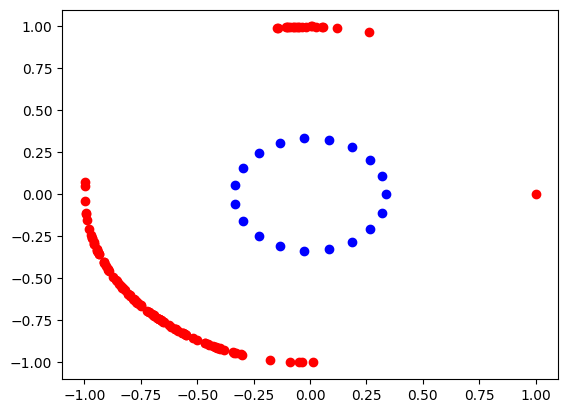

In [5]:
plt.plot(antenna_positions[:,0],
         antenna_positions[:,1],
         'bo',
         transmitter_positions[:,0],
         transmitter_positions[:,1],
         'ro'
         )
plt.show()

## MUSIC for DOA test

In [6]:
# Parameters for MUSIC

resolution = 0.15
doas = 4
time_t = 0

In [7]:
doas, _, _, psd, thetas = music_algorithm(cov[time_t], antenna_positions, wavelength, doas, resolution=resolution)
thetas *= np.pi/180

In [8]:
doas

array([ 91.8 , 203.1 , 221.25, 240.15])

In [9]:
def cartesian_to_arg(cartesian_coords):
    return np.angle(cartesian_coords[0] + cartesian_coords[1] * 1j)

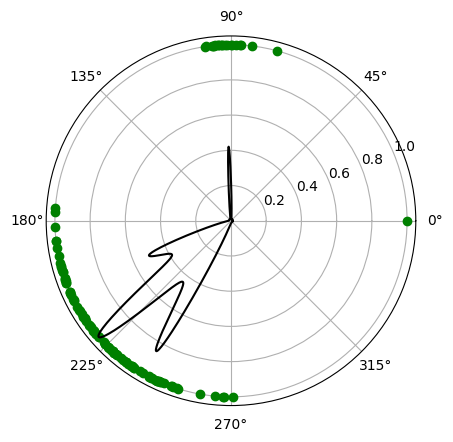

In [10]:
plt.polar(list(map(cartesian_to_arg,transmitter_positions)), np.ones(len(transmitter_positions)), "go", thetas, psd/np.max(psd), '-k')
plt.show()

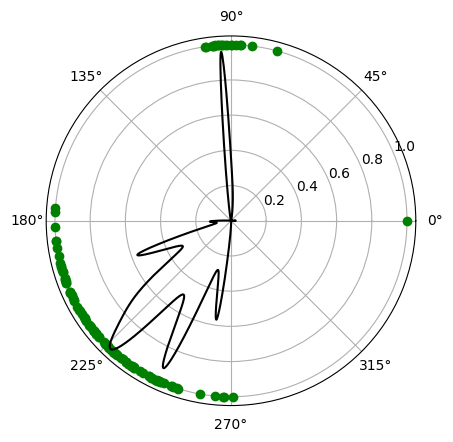

In [19]:
# with more DOAs:

doas = 12
doas, _, _, psd, thetas = music_algorithm(cov[time_t], antenna_positions, wavelength, doas, resolution=resolution)
thetas *= np.pi/180
plt.polar(list(map(cartesian_to_arg,transmitter_positions)), np.ones(len(transmitter_positions)), "go", thetas, psd/np.max(psd), '-k')
plt.show()

In [21]:
doas

array([ 93.3, 200.1, 226.8, 245.4, 261.6])

In [25]:
# Simulated data

simulated_transmitter_positions = np.array(
    [
        [0, 1],
        [1, 0],
        [-1, 0],
        [0, -1]
    ]
)

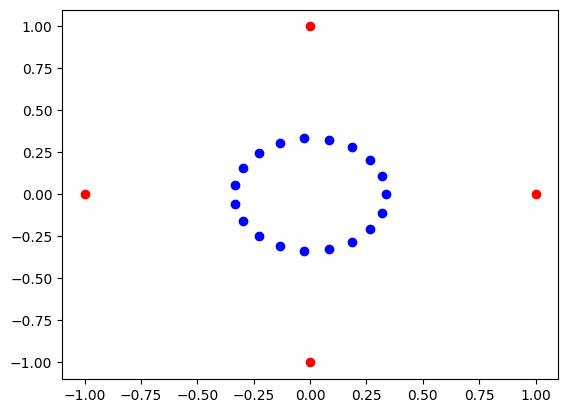

In [26]:
plt.plot(antenna_positions[:,0],
         antenna_positions[:,1],
         'bo',
         simulated_transmitter_positions[:,0],
         simulated_transmitter_positions[:,1],
         'ro'
         )
plt.show()

## Matched beamforming test

In [12]:
angle = 225
angle = angle * np.pi/180
r0 = np.array([np.cos(angle), np.sin(angle)])
b_gains, ts = matched_beam(antenna_positions, wavelength, r0)

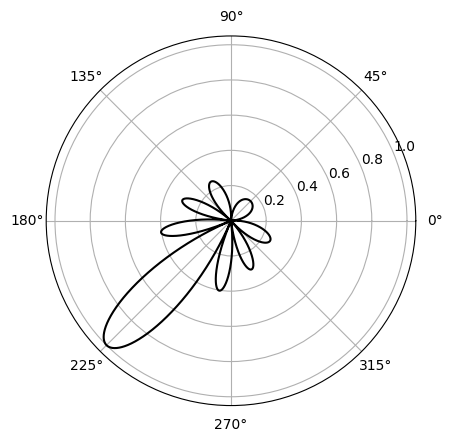

In [13]:
plt.polar(ts, b_gains/np.max(b_gains), '-k')
plt.show()

In [16]:
average_throughput(matched_beam, antenna_positions, wavelength, transmitter_positions)

3898132.0178844742

In [17]:
variance_throughput(matched_beam, antenna_positions, wavelength, transmitter_positions)

8928429985370.234